# Contens


1. [Imports](#Imports)
2. [Setup](#Setup)
3. [Data Cleaning](#Data-Cleaning)
4. [Visualization](#Visualization)
5. [Subsampling](#Subsampling)
6. [Visualisation of geographic data](#Visualisation-of-geographic-data)
7. [Correlation](#Correlation)
8. [Model](#Model)
9. [Model Evaluation](#Model-Evaluation)




# Imports


In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.image as mpimg
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Setup

In [2]:
df_houses = pd.read_csv('houses.csv', encoding='ISO-8859-1')
df_houses.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23764 entries, 0 to 23763
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23764 non-null  int64  
 1   address     23764 non-null  object 
 2   city        23764 non-null  object 
 3   floor       23764 non-null  float64
 4   id          23764 non-null  float64
 5   latitude    23764 non-null  float64
 6   longitude   23764 non-null  float64
 7   price       23764 non-null  float64
 8   rooms       23764 non-null  float64
 9   sq          23764 non-null  float64
 10  year        23764 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


In [3]:
df_houses

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznañ,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0
...,...,...,...,...,...,...,...,...,...,...,...
23759,23759,Stare Miasto Naramowice,Poznañ,0.0,3976.0,52.449649,16.949408,543000.0,4.0,77.00,2020.0
23760,23760,W³ochy,Warszawa,4.0,10206.0,52.186109,20.948438,910000.0,3.0,71.00,2017.0
23761,23761,Nowe Miasto Malta ul. Katowicka,Poznañ,0.0,4952.0,52.397345,16.961939,430695.0,3.0,50.67,2022.0
23762,23762,Podgórze Duchackie Walerego S³awka,Kraków,6.0,24148.0,50.024231,19.959569,359000.0,2.0,38.86,2021.0


# Data Cleaning

In [4]:
df_houses = df_houses.drop(columns='Unnamed: 0')

invalid_records = df_houses[df_houses['city'].isin(['Kraków', 'Warszawa'])]
df_houses.drop(invalid_records.index, inplace=True)

df_houses["price_code"] = pd.Categorical(df_houses["price"]).codes
print(df_houses[["price", "price_code"]])

df_houses

           price  price_code
3      1290000.0        2117
13      421427.0         953
15      547000.0        1627
17      618636.0        1768
22      563905.0        1683
...          ...         ...
23745   379900.0         710
23755   700000.0        1897
23758   294021.0         273
23759   543000.0        1609
23761   430695.0        1018

[4149 rows x 2 columns]


,address,city,floor,id,latitude,longitude,price,rooms,sq,year,price_code
3,Grunwald,Poznañ,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0,2117
13,Nowe Miasto Malta Florentyny Luboiñskiej 5,Poznañ,0.0,6081.0,52.391608,16.994063,421427.0,3.0,60.29,2019.0,953
15,Grunwald wierzawska,Poznañ,8.0,1085.0,52.400663,16.919733,547000.0,4.0,77.39,2020.0,1627
17,Grunwald Górczyn ul. Ceglana,Poznañ,1.0,3518.0,52.370993,16.863146,618636.0,3.0,66.52,2020.0,1768
22,Nowe Miasto Malta ul. Katowicka,Poznañ,3.0,5789.0,52.397345,16.961939,563905.0,4.0,77.78,2022.0,1683
...,...,...,...,...,...,...,...,...,...,...,...
23745,Grunwald Bu³garska,Poznañ,0.0,1496.0,52.395837,16.862728,379900.0,3.0,59.00,2021.0,710
23755,Grunwald ul. Brzask,Poznañ,2.0,1031.0,52.406882,16.878914,700000.0,3.0,64.00,2004.0,1897
23758,Nowe Miasto Rataje Wagrowska,Poznañ,3.0,4516.0,52.378997,16.944244,294021.0,2.0,35.23,2022.0,273
23759,Stare Miasto Naramowice,Poznañ,0.0,3976.0,52.449649,16.949408,543000.0,4.0,77.00,2020.0,1609


In [5]:
df_houses = df_houses.drop(columns=['address', 'id', 'floor', 'price_code', 'city'])
df_houses

,latitude,longitude,price,rooms,sq,year
3,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
13,52.391608,16.994063,421427.0,3.0,60.29,2019.0
15,52.400663,16.919733,547000.0,4.0,77.39,2020.0
17,52.370993,16.863146,618636.0,3.0,66.52,2020.0
22,52.397345,16.961939,563905.0,4.0,77.78,2022.0
...,...,...,...,...,...,...
23745,52.395837,16.862728,379900.0,3.0,59.00,2021.0
23755,52.406882,16.878914,700000.0,3.0,64.00,2004.0
23758,52.378997,16.944244,294021.0,2.0,35.23,2022.0
23759,52.449649,16.949408,543000.0,4.0,77.00,2020.0


Outliers removal

<AxesSubplot:>

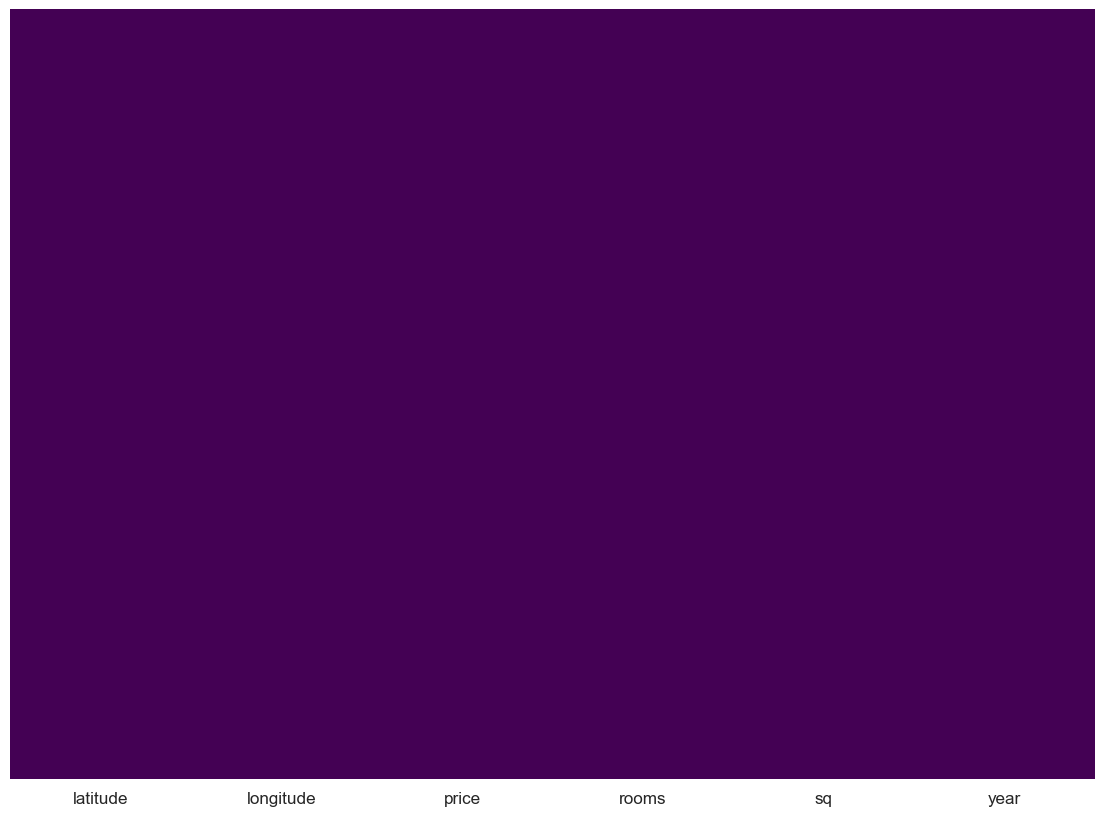

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,10))
sns.set_context('paper', font_scale=1.4)

sns.heatmap(df_houses.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df_houses.sort_values('longitude')

,latitude,longitude,price,rooms,sq,year
10603,52.300021,16.571155,255900.0,4.0,72.74,1900.0
22946,52.300021,16.571155,269900.0,3.0,60.49,1900.0
533,52.300021,16.571155,405000.0,2.0,90.00,1905.0
772,52.300021,16.571155,339900.0,3.0,73.00,1900.0
18229,52.300021,16.571155,417420.0,3.0,92.76,1900.0
...,...,...,...,...,...,...
12236,52.476041,17.280037,480000.0,3.0,69.00,1993.0
500,49.975243,19.094712,435000.0,3.0,56.40,1962.0
22374,49.975243,19.094712,299900.0,1.0,28.50,1902.0
5415,49.975243,19.094712,359000.0,2.0,47.40,1930.0


In [8]:
threshold = 18
df_houses = df_houses[df_houses['longitude'] <=  threshold]

In [9]:
df_houses.sort_values('sq')

,latitude,longitude,price,rooms,sq,year
21480,52.389775,16.917438,113900.0,1.0,13.30,1910.0
12172,52.387661,16.914801,187500.0,1.0,20.00,1902.0
992,52.389775,16.917438,219000.0,1.0,20.00,1905.0
13853,52.431577,16.826483,98000.0,1.0,20.00,1995.0
14820,52.400663,16.919733,164912.0,1.0,20.03,2018.0
...,...,...,...,...,...,...
5812,52.400663,16.919733,1200000.0,2.0,225.00,2020.0
13187,52.400663,16.919733,1125000.0,2.0,225.00,2021.0
4671,52.405370,16.902330,536800.0,10.0,244.00,1908.0
18636,52.400663,16.919733,347776.0,2.0,379.52,2021.0


In [10]:
threshold2 = 350
df_houses = df_houses[df_houses['sq'] <= threshold2]

In [11]:
df_houses.sort_values('year')

,latitude,longitude,price,rooms,sq,year
7659,52.326362,16.962886,235000.00,2.0,40.50,70.0
14431,52.400663,16.919733,375000.00,3.0,64.00,80.0
8972,52.401662,16.910061,329000.00,2.0,27.80,195.0
18433,52.408289,16.933598,950000.00,3.0,51.70,1535.0
23297,52.408721,16.933654,419178.24,2.0,49.96,1860.0
...,...,...,...,...,...,...
11986,52.400663,16.919733,372900.00,2.0,51.80,2023.0
3531,52.403023,16.862065,359000.00,2.0,43.75,2023.0
11876,52.400663,16.919733,513300.00,4.0,71.30,2023.0
6337,52.400663,16.919733,358100.00,2.0,48.00,2023.0


In [12]:
threshold3 = 200
df_houses = df_houses[df_houses['year'] >= threshold3]

In [13]:
df_houses['price_per_sq'] = df_houses['price'] / df_houses['sq']
df_houses

,latitude,longitude,price,rooms,sq,year,price_per_sq
3,52.404212,16.882542,1290000.0,5.0,166.00,1935.0,7771.084337
13,52.391608,16.994063,421427.0,3.0,60.29,2019.0,6989.998341
15,52.400663,16.919733,547000.0,4.0,77.39,2020.0,7068.096653
17,52.370993,16.863146,618636.0,3.0,66.52,2020.0,9300.000000
22,52.397345,16.961939,563905.0,4.0,77.78,2022.0,7250.000000
...,...,...,...,...,...,...,...
23745,52.395837,16.862728,379900.0,3.0,59.00,2021.0,6438.983051
23755,52.406882,16.878914,700000.0,3.0,64.00,2004.0,10937.500000
23758,52.378997,16.944244,294021.0,2.0,35.23,2022.0,8345.756458
23759,52.449649,16.949408,543000.0,4.0,77.00,2020.0,7051.948052


# Visualization

Text(0.5, 1.0, 'The size of the apartment [sqm] vs price Poznań')

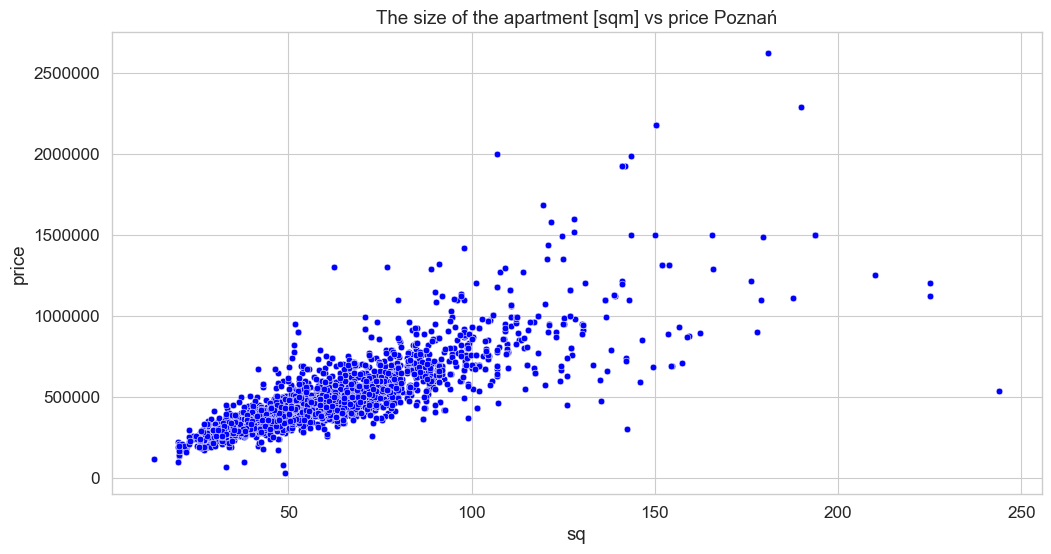

In [14]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='y')

g = sns.scatterplot(x='sq', y= 'price', data = df_houses, color = 'blue')
g.set_title('The size of the apartment [sqm] vs price Poznań')

# Subsampling

<AxesSubplot:>

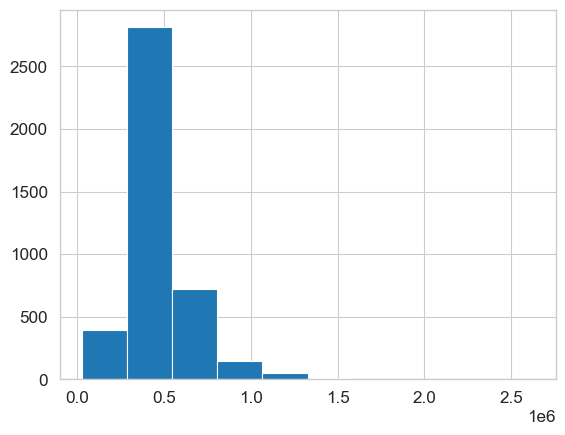

In [15]:
df_houses["price"].hist()

In [16]:
df_houses["Ceny"] = pd.cut(df_houses["price"],
                               bins=[0., 300000, 450000, 600000, 800000, np.inf],
                               labels=[1, 2, 3, 4, 5])


<AxesSubplot:>

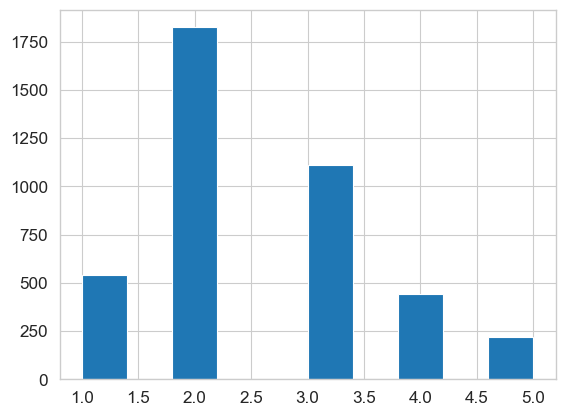

In [17]:
df_houses["Ceny"].hist()

In [18]:
df_houses = df_houses.reset_index(drop=True)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_houses, df_houses["Ceny"]):
    strat_train_set = df_houses.loc[train_index]
    strat_test_set = df_houses.loc[test_index]

In [19]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Ceny", axis=1, inplace=True)

# Visualisation of geographic data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

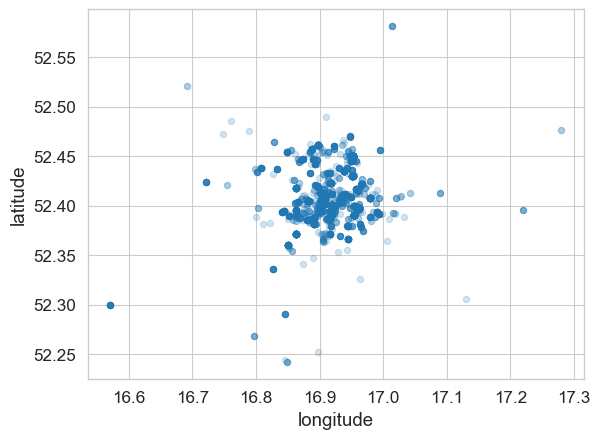

In [20]:
df_houses.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

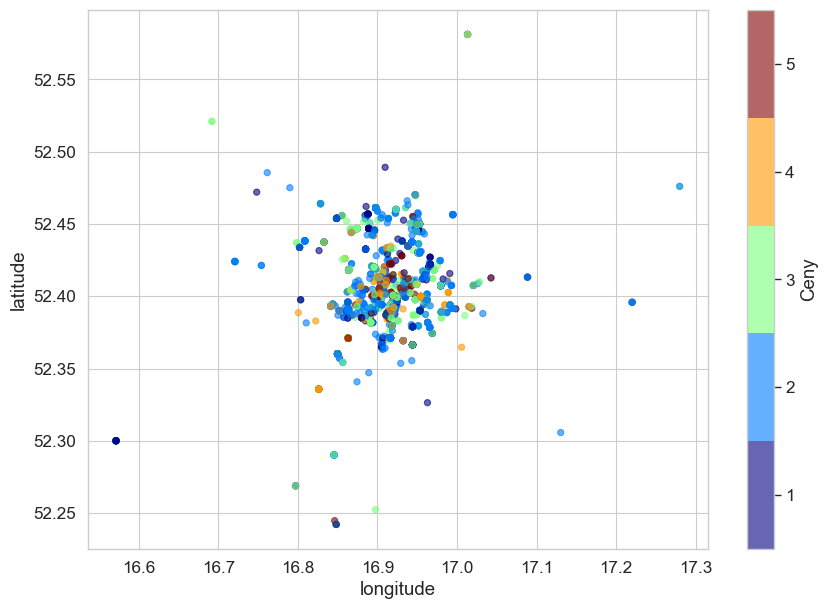

In [21]:
df_houses.plot(kind="scatter", x="longitude", y="latitude", alpha=0.6,
             figsize=(10,7), c="Ceny", cmap=plt.get_cmap("jet"), colorbar=True)



Text(0.5, 0, 'Longitude')

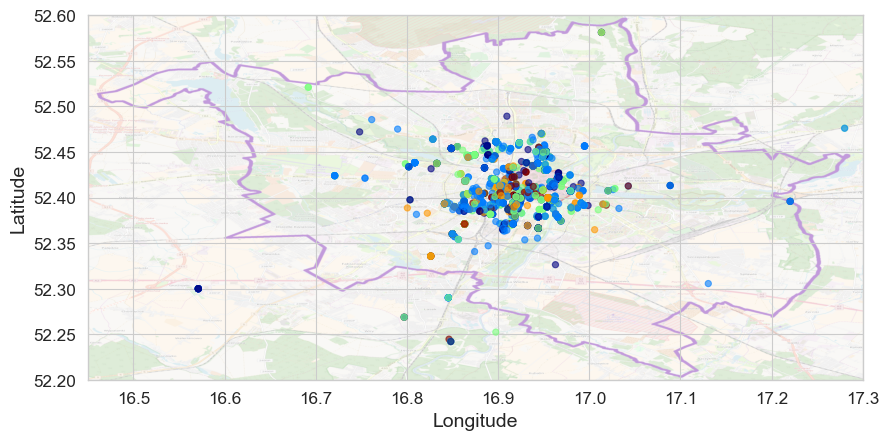

In [22]:
poznan_img = mpimg.imread("poznan.png")
ax = df_houses.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),

                  c="Ceny", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.6)
plt.imshow(poznan_img, extent=[16.45, 17.3, 52.20, 52.60], alpha=0.4,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# Correlation

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='sq', ylabel='price'>,
        <AxesSubplot:xlabel='rooms', ylabel='price'>,
        <AxesSubplot:xlabel='year', ylabel='price'>,
        <AxesSubplot:xlabel='price_per_sq', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='sq'>,
        <AxesSubplot:xlabel='sq', ylabel='sq'>,
        <AxesSubplot:xlabel='rooms', ylabel='sq'>,
        <AxesSubplot:xlabel='year', ylabel='sq'>,
        <AxesSubplot:xlabel='price_per_sq', ylabel='sq'>],
       [<AxesSubplot:xlabel='price', ylabel='rooms'>,
        <AxesSubplot:xlabel='sq', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='year', ylabel='rooms'>,
        <AxesSubplot:xlabel='price_per_sq', ylabel='rooms'>],
       [<AxesSubplot:xlabel='price', ylabel='year'>,
        <AxesSubplot:xlabel='sq', ylabel='year'>,
        <AxesSubplot:xlabel='rooms', ylabel='year'>,
        <AxesSubplot:xlabel='year', y

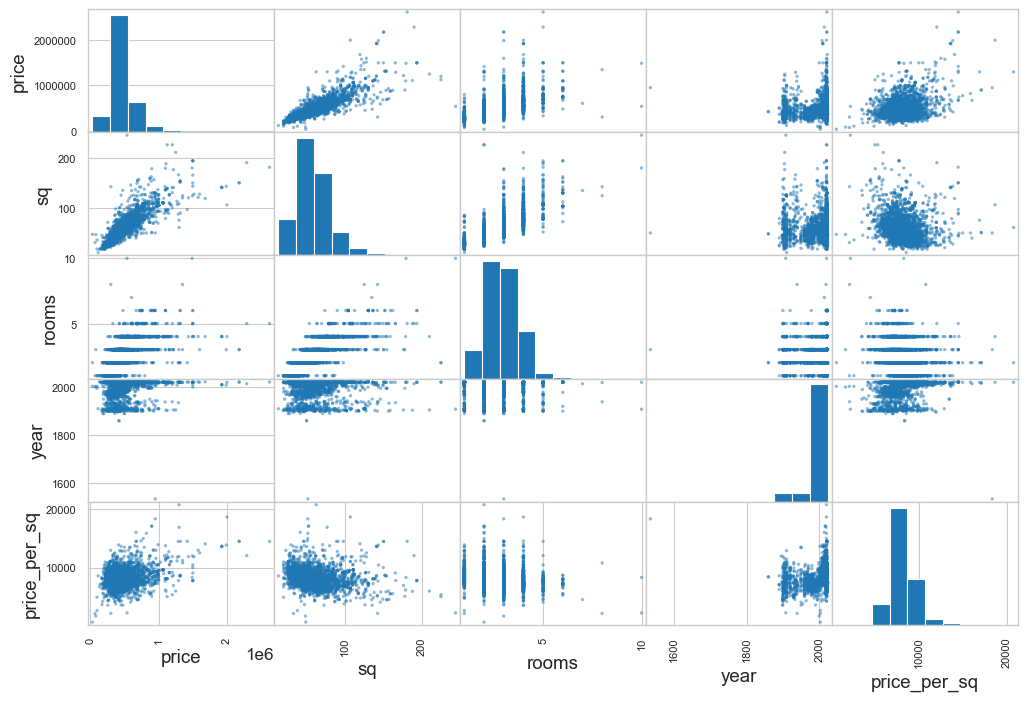

In [23]:
attributes = ["price", "sq", "rooms", "year", "price_per_sq"]
scatter_matrix(df_houses[attributes], figsize=(12, 8))

<AxesSubplot:>

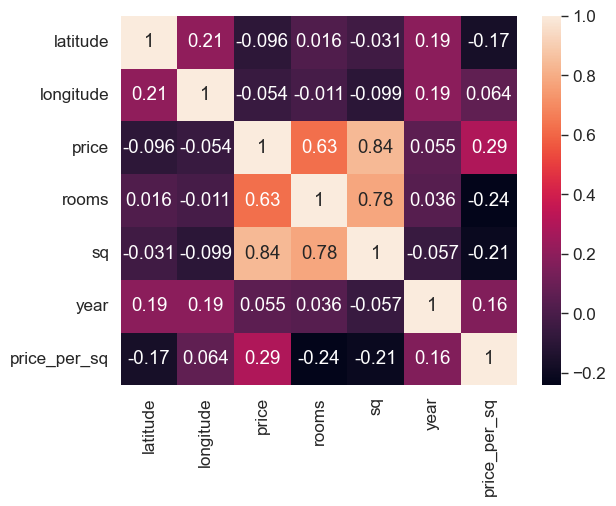

In [24]:
sns.heatmap(df_houses.corr(), annot = True)

# Model

In [25]:
y = df_houses.price
df_houses_features = ['rooms', 'sq', 'year', 'longitude', 'latitude']
X = df_houses[df_houses_features]
X.describe

<bound method NDFrame.describe of       rooms      sq    year  longitude   latitude
0       5.0  166.00  1935.0  16.882542  52.404212
1       3.0   60.29  2019.0  16.994063  52.391608
2       4.0   77.39  2020.0  16.919733  52.400663
3       3.0   66.52  2020.0  16.863146  52.370993
4       4.0   77.78  2022.0  16.961939  52.397345
...     ...     ...     ...        ...        ...
4135    3.0   59.00  2021.0  16.862728  52.395837
4136    3.0   64.00  2004.0  16.878914  52.406882
4137    2.0   35.23  2022.0  16.944244  52.378997
4138    4.0   77.00  2020.0  16.949408  52.449649
4139    3.0   50.67  2022.0  16.961939  52.397345

[4140 rows x 5 columns]>

In [26]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 1)

df_houses_model = DecisionTreeRegressor()
df_houses_model.fit(train_X, train_y)

val_predictions = df_houses_model.predict(test_X)
print(mean_absolute_error(test_y, val_predictions))

43450.02124502228


In [27]:
mean_absolute_error(test_y, val_predictions) * 100 / df_houses['price'].mean()

9.269245792792177

In [28]:
def get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(test_X)
    mae = mean_absolute_error(test_y, preds_val)
    return(mae)

In [29]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  74367
Max leaf nodes: 50  		 Mean Absolute Error:  50201
Max leaf nodes: 500  		 Mean Absolute Error:  44895
Max leaf nodes: 5000  		 Mean Absolute Error:  42939


In [30]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=13)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(test_X)
print(mean_absolute_error(test_y, melb_preds))

36353.148739632226


# Model Evaluation


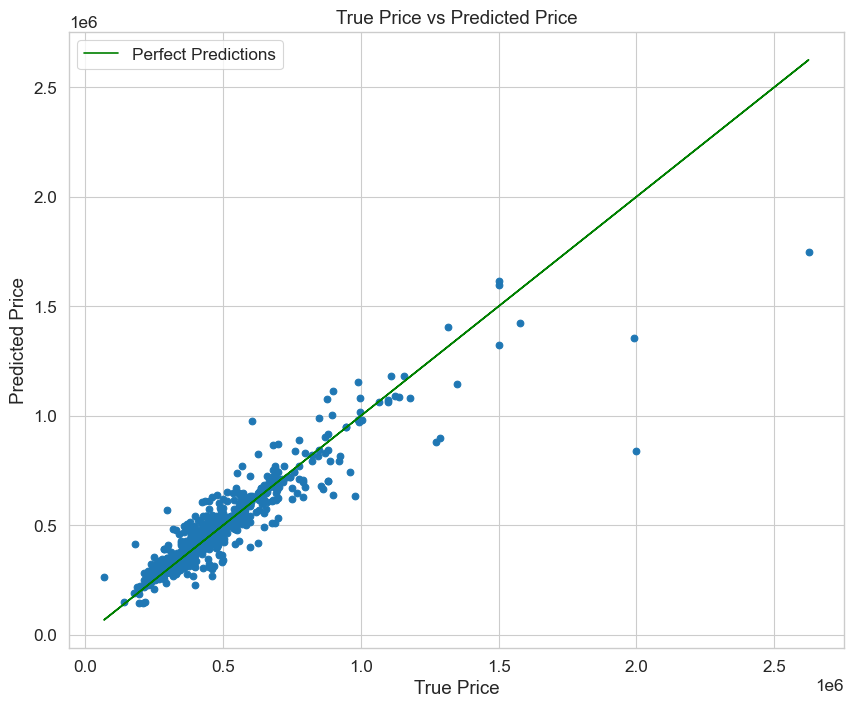

In [31]:
# Our predictions
plt.figure(figsize=(10,8))
plt.scatter(test_y, melb_preds)

# Perfect predictions
line = plt.plot(test_y, test_y,'green')

# labels
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('True Price vs Predicted Price')
plt.legend(line, ['Perfect Predictions']);


In [32]:
mean_absolute_error(test_y, melb_preds) * 100 / df_houses['price'].mean()

7.755261363610673